# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv', index_col=0)
south_df = pd.read_csv('SouthCallCenter.csv', index_col=0)
north_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [2]:
south_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [3]:
#Code Used:
len(north_df['Rep ID'].unique())

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [4]:
#Code Used:
len(south_df['Rep ID'].unique())

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [5]:
#Code Used:
north_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].agg('mean')

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [6]:
#Code Used:
south_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].agg('mean')

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [7]:
# Code Used:
north_timeblock = north_df.groupby('Time Block').size()
south_timeblock = south_df.groupby('Time Block').size()

In [8]:
timeblock = pd.DataFrame({'North': north_timeblock,
                             'South': south_timeblock})
timeblock['Total'] = timeblock['North'] + timeblock['South']
timeblock

,North,South,Total
Time Block,,,
10:00 AM,43,56,99
11:00 AM,25,31,56
12:00 PM,45,75,120
1:00 PM,17,23,40
2:00 PM,35,30,65
3:00 PM,30,43,73
4:00 PM,28,25,53
5:00 PM,17,26,43
9:00 AM,5,5,10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.04
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: The Incoming Wait Time column is 67% empty for the North branch and 60% empty for the South branch. I've confirmed that the empty values occur only on Outgoing calls and filled the empty values with 0. 

In [9]:
# Generate list of columns in the North list along with % of empty records.
north_pct_dict = {}
for col in north_df.columns:
    pct_missing_north = np.mean(north_df[col].isnull())
    north_pct_dict[col] = '{}%'.format(round(pct_missing_north*100))
north_pct_dict

{'Branch': '0%',
 'Call Purpose': '0%',
 'Time Block': '0%',
 'Incoming or Outgoing': '0%',
 'Queue': '0%',
 'Rep ID': '0%',
 'Sale': '0%',
 'Lost Call': '0%',
 'Abandoned': '0%',
 'Busy Minutes': '0%',
 'Not Ready Minutes': '0%',
 'Incoming Wait Time': '67%',
 'During Call Wait Time': '0%',
 'Calls': '0%'}

In [10]:
# Check for any records in the North table that are null in the Incoming Wait Time that are also marked as Incoming calls
north_df[(north_df['Incoming Wait Time'] == 0) & (north_df['Incoming or Outgoing'] == 'Incoming')]

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [11]:
# Fill null values in Incoming Wait Time in the North table with 0.
north_df['Incoming Wait Time'].fillna(0, inplace=True)
'Incoming Wait Time in North Branch: {}% empty'.format(round(np.mean(north_df['Incoming Wait Time'].isnull())*100))


'Incoming Wait Time in North Branch: 0% empty'

In [12]:
# Generate list of columns in the South list along with % of empty records.
south_pct_dict = {}
for col in south_df.columns:
    pct_missing_south = np.mean(south_df[col].isnull())
    south_pct_dict[col] = '{}%'.format(round(pct_missing_south*100))
south_pct_dict

{'Branch': '0%',
 'Call Purpose': '0%',
 'Time Block': '0%',
 'Incoming or Outgoing': '0%',
 'Queue': '0%',
 'Rep ID': '0%',
 'Sale': '0%',
 'Lost Call': '0%',
 'Abandoned': '0%',
 'Busy Minutes': '0%',
 'Not Ready Minutes': '0%',
 'Incoming Wait Time': '60%',
 'During Call Wait Time': '0%',
 'Calls': '0%'}

In [13]:
# Check for any records in the South table that are null in the Incoming Wait Time that are also marked as Incoming calls
south_df[(south_df['Incoming Wait Time'] == 0) & (south_df['Incoming or Outgoing'] == 'Incoming')]

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [14]:
# Fill null values in Incoming Wait Time in the South table with 0.
south_df['Incoming Wait Time'].fillna(0, inplace=True)
'Incoming Wait Time in South Branch: {}% empty'.format(round(np.mean(south_df['Incoming Wait Time'].isnull())*100))


'Incoming Wait Time in South Branch: 0% empty'

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: There was one value that had an additional space at the end of the string.  I identified the unique values used in the column, performed a replace on all instances of the incorrect value with the extra space, then confirmed that the unique values no longer included the incorrect entry.

In [15]:
# Identify all unique values in the Sale column of the North table.
north_df['Sale'].unique()

array(['NO', 'YES ', 'YES'], dtype=object)

In [16]:
# Replace all values of 'YES ' (with extra space) in the Sale column of the North table with 'YES' (without spaces).
north_df['Sale'].replace('YES ','YES', inplace=True)

# Identify all unique values in the Sale column of the North table to ensure the incorrect value has been removed.
north_df['Sale'].unique()


array(['NO', 'YES'], dtype=object)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There were 2 duplicates in the North table and 3 duplicates in the South table.  I have dropped them and confirmed that there were no duplicates in the revised tables.

In [17]:
# Total the number of rows in the North table that are duplicated or not duplicated.
north_df.duplicated().value_counts()

False    243
True       2
dtype: int64

In [18]:
# Total the number of rows in the South table that are duplicated or not duplicated.
south_df.duplicated().value_counts()

False    311
True       3
dtype: int64

In [19]:
# Drop the duplicates from each table
north_df = north_df.drop_duplicates()
south_df = south_df.drop_duplicates()

In [20]:
# Rerun duplicated/not duplicated totals in the North table to ensure duplicates were dropped.
north_df.duplicated().value_counts()

False    243
dtype: int64

In [21]:
# Rerun duplicated/not duplicated totals in the South table to ensure duplicates were dropped.
south_df.duplicated().value_counts()

False    311
dtype: int64

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: Since the questions are regarding rep efficiency, lost calls skew the data.

In [22]:
# Isolate records in the North table where Lost Call is not set to 0 to ensure that there are not more values than 0 (False) or 1 (True)
north_df[north_df['Lost Call'] != 0]


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
45,North,Sales Support,10:00 AM,Incoming,B,Todd,NO,1,0,9,3,4.0,4,1
82,North,Sales Support,10:00 AM,Outgoing,A,Cam,NO,1,0,8,1,0.0,2,1
83,North,Sales Support,10:00 AM,Outgoing,B,Duke,NO,1,0,10,2,0.0,4,1
84,North,Sales Support,11:00 AM,Outgoing,B,Xander,NO,1,0,10,1,0.0,4,1
85,North,Product Support,9:00 AM,Outgoing,B,Duke,NO,1,0,12,1,0.0,2,1


In [23]:
# Redefine the North table to remove records with Lost Call set to 1.
north_df = north_df[north_df['Lost Call'] == 0]

In [24]:
# Isolate records in the South table where Lost Call is not set to 0 to ensure that there are not more values than 0 (False) or 1 (True)
south_df[south_df['Lost Call'] != 0]

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
20,South,Complaint,12:00 PM,Incoming,D,Randy,NO,1,0,8,3,2.0,3,1
126,South,Product Support,9:00 AM,Outgoing,C,Sandy,NO,1,0,12,2,0.0,4,1
127,South,Product Support,9:00 AM,Outgoing,C,Susan,NO,1,0,9,3,0.0,4,1
128,South,Product Support,9:00 AM,Outgoing,D,Karl,NO,1,0,9,3,0.0,4,1
129,South,Sales Support,10:00 AM,Outgoing,C,Susan,NO,1,0,8,2,0.0,4,1
130,South,Sales Support,11:00 AM,Outgoing,D,Josh,NO,1,0,9,2,0.0,4,1
131,South,Sales Support,12:00 PM,Outgoing,D,Josh,NO,1,0,12,1,0.0,3,1
132,South,Sales Support,12:00 PM,Outgoing,C,Sharon,NO,1,0,11,2,0.0,4,1
133,South,Product Support,1:00 PM,Outgoing,D,Randy,NO,1,0,9,1,0.0,3,1
134,South,Product Support,5:00 PM,Outgoing,D,Josh,NO,1,0,9,1,0.0,4,1


In [25]:
# Redefine the South table to remove records with Lost Call set to 1.
south_df = south_df[south_df['Lost Call'] == 0]

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [26]:
# Create dataframe for the entire company named df by combining the North and South tables
df = pd.concat([north_df,south_df],ignore_index=True)
# Review first five rows
df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [27]:
# Review last five rows to ensure table includes both branches
df.tail()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
533,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,0.0,4,1
534,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,0.0,4,1
535,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,0.0,4,1
536,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,0.0,2,1
537,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,0.0,3,1


In [28]:
# Review info on company dataframe to ensure no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 538 non-null    object 
 1   Call Purpose           538 non-null    object 
 2   Time Block             538 non-null    object 
 3   Incoming or Outgoing   538 non-null    object 
 4   Queue                  538 non-null    object 
 5   Rep ID                 538 non-null    object 
 6   Sale                   538 non-null    object 
 7   Lost Call              538 non-null    int64  
 8   Abandoned              538 non-null    int64  
 9   Busy Minutes           538 non-null    int64  
 10  Not Ready Minutes      538 non-null    int64  
 11  Incoming Wait Time     538 non-null    float64
 12  During Call Wait Time  538 non-null    int64  
 13  Calls                  538 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 59.0+ KB


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent (37)
- South Branch = Eric (35)


In [29]:
# Group by the branch and rep ID with an aggregate count of calls
by_rep = df.groupby(['Branch','Rep ID']).agg({'Calls': 'count'})

# reset index in order to be able to sort Calls values in descending order 
ordered_reps = by_rep.reset_index().sort_values(['Calls'],ascending=False)
ordered_reps

,Branch,Rep ID,Calls
2,North,Brent,37
10,South,Eric,35
12,South,Helga,31
6,North,Lilly,30
17,South,Sandy,30
16,South,Randy,29
11,South,George,29
7,North,Todd,28
15,South,Kate,28
14,South,Karl,27


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.94%
- South Branch = 1.33%
- Company Wide = 2.05%
- Do any of these fall out of the optimal range of 2-5%? The North branch and company rates are inside the optimal range, and the South branch is under this range.

In [30]:
# group the company table by Branch and aggregate the sum of the Calls and Abandoned columns
abandoned_records = df.groupby(['Branch']).agg({'Calls':'sum','Abandoned':'sum'})

# Add a Total row with a sum of each column
abandoned_records.loc['Total'] = abandoned_records.sum()

# Add a Rate column with the percentage of abandoned calls
abandoned_records['Rate'] = abandoned_records['Abandoned'] / abandoned_records['Calls'] * 100
abandoned_records

,Calls,Abandoned,Rate
Branch,,,
North,238,7,2.941176
South,300,4,1.333333
Total,538,11,2.044610


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 80.25% (191 of 238 calls)
- South Branch = 74.33% (223 of 300 calls)
- Company Wide = 76.95% (414 of 538 calls)

In [32]:
# Add column to company dataframe with a boolean value for KPI met or not (value of 0 for False or 1 for True). 
# Service Level Met is answer time under 2 seconds.  Answer time = Incoming Wait Time + Busy Minutes + Not Ready Minutes
service_level_table = df
service_level_table['Service Level Met'] = ((service_level_table['Incoming Wait Time']) <= 2) * 1

# group the company table by Branch and aggregate the sum of the Calls and Service Level columns
assess_service_level = service_level_table.groupby(['Branch']).agg({'Calls':'sum','Service Level Met':'sum'})

# Add a Total row with a sum of each column
assess_service_level.loc['Total'] = assess_service_level.sum()

# Add a Rate column with the percentage of calls meeting the service level KPI
assess_service_level['Rate'] = assess_service_level['Service Level Met'] / abandoned_records['Calls'] * 100
assess_service_level

,Calls,Service Level Met,Rate
Branch,,,
North,238,191,80.252101
South,300,223,74.333333
Total,538,414,76.951673


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 1.02
- South Branch in seconds = 1.24
- Company Wide in seconds = 1.14


In [34]:
# group the company table by Branch and aggregate the average Incoming Wait Time, Busy Minutes, and Not Ready Minutes
answer_averages = df.groupby(['Branch']).agg({'Calls':'sum','Incoming Wait Time':'mean'})

# Define company averages
Company_answers = df.agg({'Calls':'sum','Incoming Wait Time':'mean'})

# Add Company_answers as a row on answer_averages
answer_averages.loc['Company'] = Company_answers
answer_averages

,Calls,Incoming Wait Time
Branch,,
North,238.0,1.016807
South,300.0,1.243333
Company,538.0,1.143123


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: The bar chart visualizes the differences  in rates between the queue groups.

In [35]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sns
import matplotlib.pyplot as plt


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

# Define dataset using dictionary
abandonment_table = pd.DataFrame.from_dict(abandonment_rates, orient='index', columns=["Abandonment Rate"])
abandonment_table



,Abandonment Rate
A,0.043011
B,0.020690
C,0.007519
D,0.017964


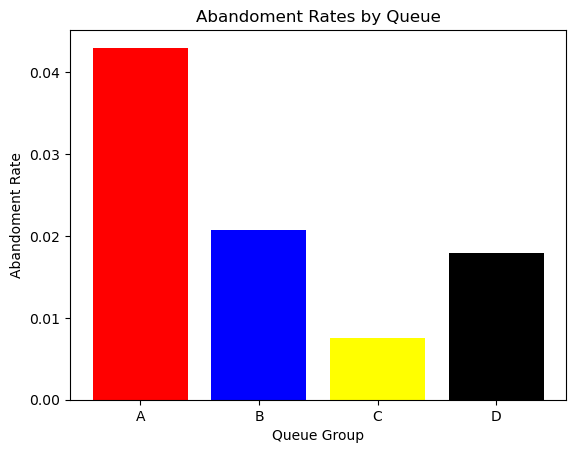

In [36]:

# Set bar chart parameters
plt.bar(abandonment_table.index,abandonment_table['Abandonment Rate'],color=['red', 'blue', 'yellow', 'black']);
# Adding the aesthetics
plt.title('Abandoment Rates by Queue');
plt.xlabel('Queue Group');
plt.ylabel('Abandoment Rate'); 



#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
north_plt


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: